## 탐색적 데이터 분석

### 데이터 둘러보기

In [2]:
import pandas as pd

# 데이터 경로
data_path = '/kaggle/input/porto-seguro-safe-driver-prediction/'

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

In [3]:
train.shape, test.shape

((595212, 58), (892816, 57))

In [4]:
train.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [6]:
test.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,1,8,1,0,0,1,0,0,0,0,0,0,0,12,1,0,0,0.5,0.3,0.610328,7,1,-1,0,-1,1,1,1,2,1,65,1,0.316228,0.669556,0.352136,3.464102,0.1,0.8,0.6,1,1,6,3,6,2,9,1,1,1,12,0,1,1,0,0,1
1,4,2,5,1,0,0,0,0,1,0,0,0,0,0,5,1,0,0,0.9,0.5,0.771362,4,1,-1,0,0,11,1,1,0,1,103,1,0.316228,0.606320,0.358329,2.828427,0.4,0.5,0.4,3,3,8,4,10,2,7,2,0,3,10,0,0,1,1,0,1
2,5,1,3,0,0,0,0,0,1,0,0,0,0,0,10,0,0,0,0.4,0.0,0.916174,11,1,-1,0,-1,14,1,1,2,1,29,3,0.400000,0.896239,0.398497,3.316625,0.6,0.6,0.6,2,3,7,4,6,3,12,4,0,2,4,0,0,0,0,0,0
3,0,1,6,0,0,1,0,0,0,0,0,0,0,0,4,1,0,0,0.1,0.2,-1.000000,7,1,-1,0,-1,1,1,1,2,1,40,2,0.374166,0.652110,0.381445,2.449490,0.1,0.5,0.5,2,1,7,3,12,1,13,5,1,0,5,1,0,1,0,0,0
4,5,1,7,0,0,0,0,0,1,0,0,0,0,0,4,1,0,0,0.9,0.4,0.817771,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.812914,0.385097,3.316625,0.9,0.6,0.8,3,4,7,1,10,4,12,4,0,0,4,0,1,1,0,0,1


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 595212 entries, 7 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17_bin 

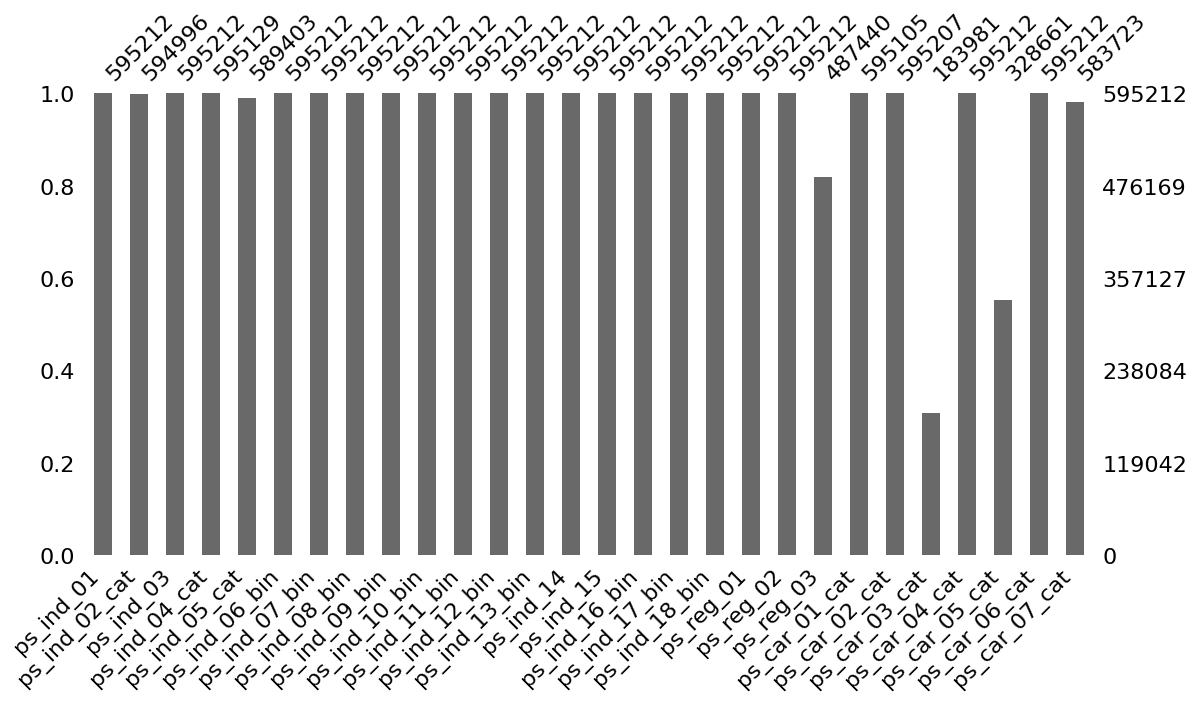

In [9]:
import numpy as np
import missingno as msno # 결측값을 시각화하는 패키지

# 훈련 데이터 복사분에서 -1을 np.NaN로 변환
train_copy = train.copy().replace(-1, np.NaN)

# 결측값 시각화(처음 28개만)
msno.bar(df=train_copy.iloc[:, 1:29], figsize=(13,6));

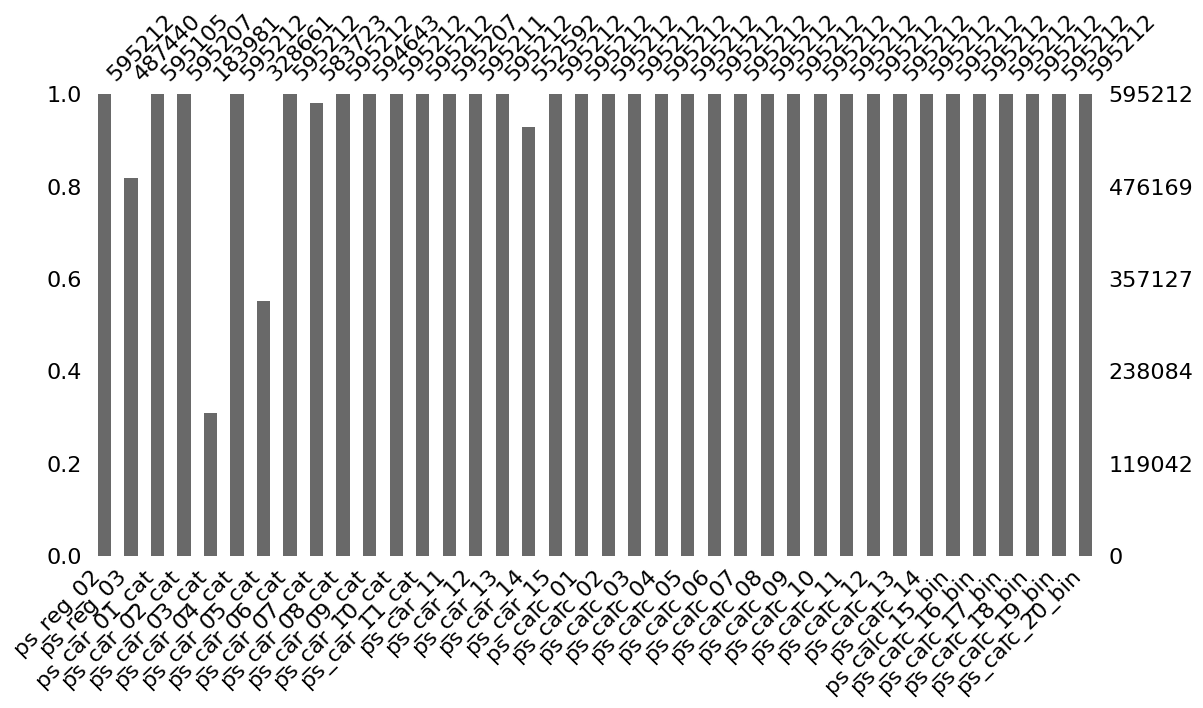

In [10]:
msno.bar(df=train_copy.iloc[:,20:], figsize=(13,6));

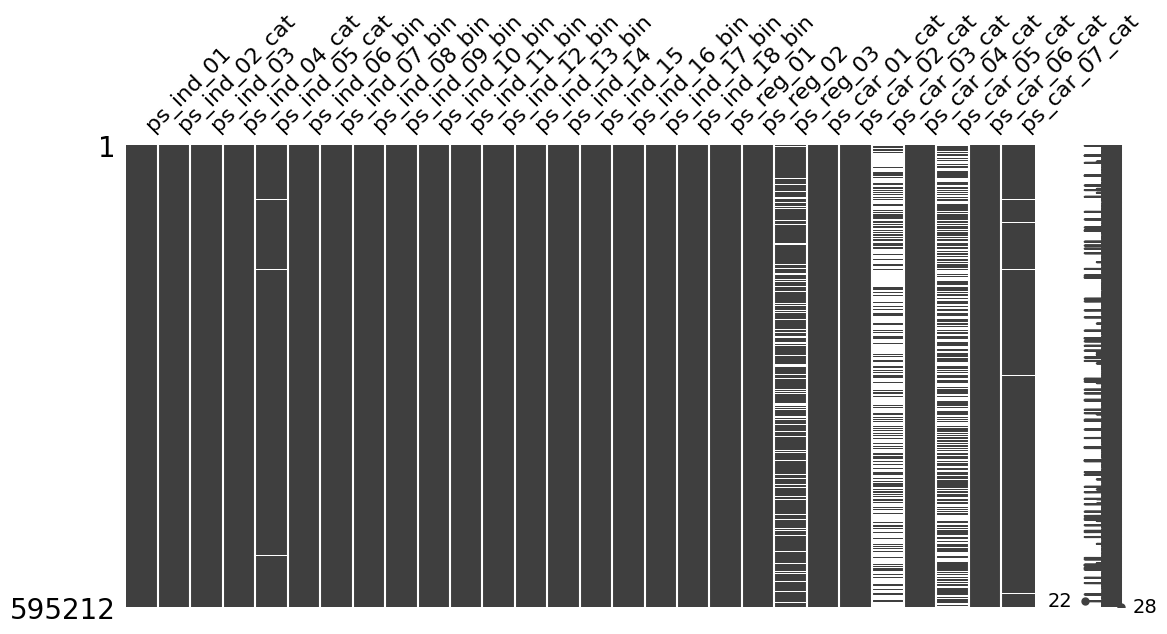

In [12]:
msno.matrix(df=train_copy.iloc[:, 1:29], figsize=(13,6));

#### 피처 요약표

In [21]:
def resumetable(df):
    print(f'데이터셋 형상 : {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary['결측값 개수'] = (df == -1).sum().values # 피처별 -1rotn
    summary['고윳값 개수'] = df.nunique().values
    summary['데이터 종류'] = None
    for col in df.columns: # (2)
        if 'bin' in col or col == 'target':
            summary.loc[col, '데이터 종류'] = '이진형'
        elif 'cat' in col:
            summary.loc[col, '데이터 종류'] = '명목형'
        elif df[col].dtype == float:
            summary.loc[col, '데이터 종류'] = '연속형'
        elif df[col].dtype == int:
            summary.loc[col, '데이터 종류'] = '순서형'
            
    return summary

- 결측값이 -1이므로 결측값 개수를 구하려면 -1의 개수를 구해야한다.
- (1) 처럼 (df==-1).sum().values 코드로 피처별 -1 갯수를 구할 수 잇다.
- (2) 에서는 for문을 순회하며 데이터 종류를 추가했다. 피처명에 'bin'이 포함돼 있거나 타깃 열이면 이진형 데이터이고 'cat'이 포함돼 있으면 명목형이다.
- 데이터 타입이float면 연속형 데이터이며, int면 순서형 데이터

In [22]:
summary = resumetable(train)
summary

데이터셋 형상 : (595212, 58)


,데이터 타입,결측값 개수,고윳값 개수,데이터 종류
target,int64,0,2,이진형
ps_ind_01,int64,0,8,순서형
ps_ind_02_cat,int64,216,5,명목형
ps_ind_03,int64,0,12,순서형
ps_ind_04_cat,int64,83,3,명목형
ps_ind_05_cat,int64,5809,8,명목형
ps_ind_06_bin,int64,0,2,이진형
ps_ind_07_bin,int64,0,2,이진형
ps_ind_08_bin,int64,0,2,이진형
ps_ind_09_bin,int64,0,2,이진형


- 인덱스는 피처명이다. 데이터 타입 열에는 해당 피처의 데이터 타입이 기재돼 있다. 결측값 개수와 교윳값 개수도 한눈에 볼 수 있다.

In [23]:
summary[summary['데이터 종류'] == '명목형'].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object')

In [24]:
summary[summary['데이터 타입'] == 'float64'].index

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'],
      dtype='object')

### 데이터 시각화
- 데이터 시각화를 통해 모델링에 필요한 피처는 무엇이고, 필요없는 피처는 무엇인지 선별해보겠다.
- 먼저 타깃값 분포를 활용해 타깃값이 얼마나 불균형한지 알아보겠다. 더불어 이진 피처, 명목형 피처, 순서형 피처의 고윳값별 타깃값 비율을 알아보겠다.
- 시각화를 해보면 어떤 피처를 제거해야할지 알게 된다.

In [25]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#### 타깃값 분포

Text(0.5, 1.0, 'Target Distribution')

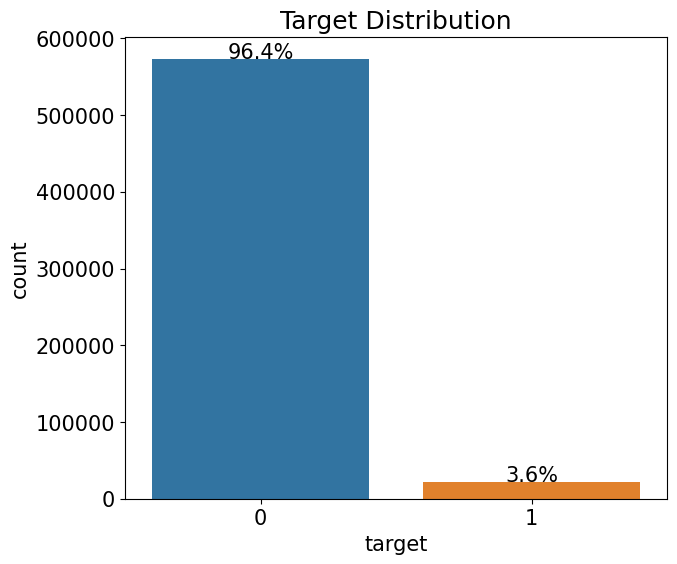

In [27]:
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 그래프 상단에 타깃값 배율 표시'''
    for patch in ax.patches:
        height = patch.get_height() # 도형 높이(데이터 개수)
        width = patch.get_width() # 도형 너비
        left_coord = patch.get_x() # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율
        
        # (x, y)좌표에 텍스트 입력
        ax.text(left_coord + width/2.0, # x축 위치
                height + total_size* 0.001, # y축 위치
                '{:1.1f}%'.format(percent), # 입력 텍스트
                ha='center' # 가운데 정렬
               )
        
mpl.rc('font', size=15)
plt.figure(figsize=(7,6))

ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train)) # 비율 표시
ax.set_title('Target Distribution')

- 타깃값 0은 96.4%를 차지하며 1은 단 3.6%만 차지한다. 전체 운전자 중 3.6%만 보험금을 청구했다는 뜻이다.
- 차 사고가 그리 흔하게 나진 않는다. 그래서 소수의 운전자만 보험금을 청구했다.
- 타깃값이 불균형하기 때문에 비율이 작은 타깃값 1을 잘 예측하는게 중요하다. 따라서 이번에는 각 피처의 분포를 알아보기 보다는, 각 피처의 고윳값별 타깃값 1비율을 알아보겠다. 고윳값별 타깃값 1비율을 통해 해당 피처가 모델링에 필요한 피처인지 확인할 수 있다.


- 예컨대 피처 A에 고윳값 a,b가 있다고 하자. 이때 고윳값 a,b별로 타깃값 1비율이 얼마나 되는지 살펴보려는 거다. 고윳값별로 타깃값 1비율로 똑같거나 통계적 유효성이 떨어지면, 즉 통계적으로 유의미한 차이가 없다면 피처 A로는 무언가를 분별하기 어려우므로 예측에 도움이 되지 않는다. 다시 말해 고윳값에 따라 타깃값 비율이 달라야 그 피처가 타깃값 예측에 도움을 준다.


- 타깃값 1 비율의 통계적 유효성이 떨어져도 불필요한 피처가 될 수 있다. 통계적 유효성은 barplot()을 그릴 때 나타나는 신뢰구간으로 판단한다. 신뢰구간이 좁다면 통계적으로 어느 정도 유효하다고 보고, 구간이 넓다면 신뢰하기 어렵다고 보는 것이다. 


- 종합하자면 고윳값별 타깃값 1비율이 충분히 차이가 나고 신뢰구간도 작은 피처여야 모델링에 도움이 된다. 그렇지 않은 피처는 제거하는 게 좋다.

#### 이진 피처
- 이상의 내용에 유념해 이진 피처의 고윳값별 타깃값 비율을 구해보겠다.

In [35]:
import matplotlib.gridspec as gridspec

def plot_target_ratio_by_features(df, features, num_rows, num_cols, size=(12,18)):
    mpl.rc('font', size=9)
    plt.figure(figsize=size) # 전체 Figure 크기 설정
    grid=gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치
    plt.subplots_adjust(wspace=0.3, hspace=0.3) # 서브플롯 좌우/상하 여백 설정
    
    
    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        # ac축에 고윳갑별 타깃값 1비율을 막대 그래프로 그리기
        sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)

- 이함수를 이용해 그래프를 그려보자 주어진 데이터 중 이진 피처는 18개이다. 그려야할 그래프가 많아 서브플롯을 3열로 배치했다.

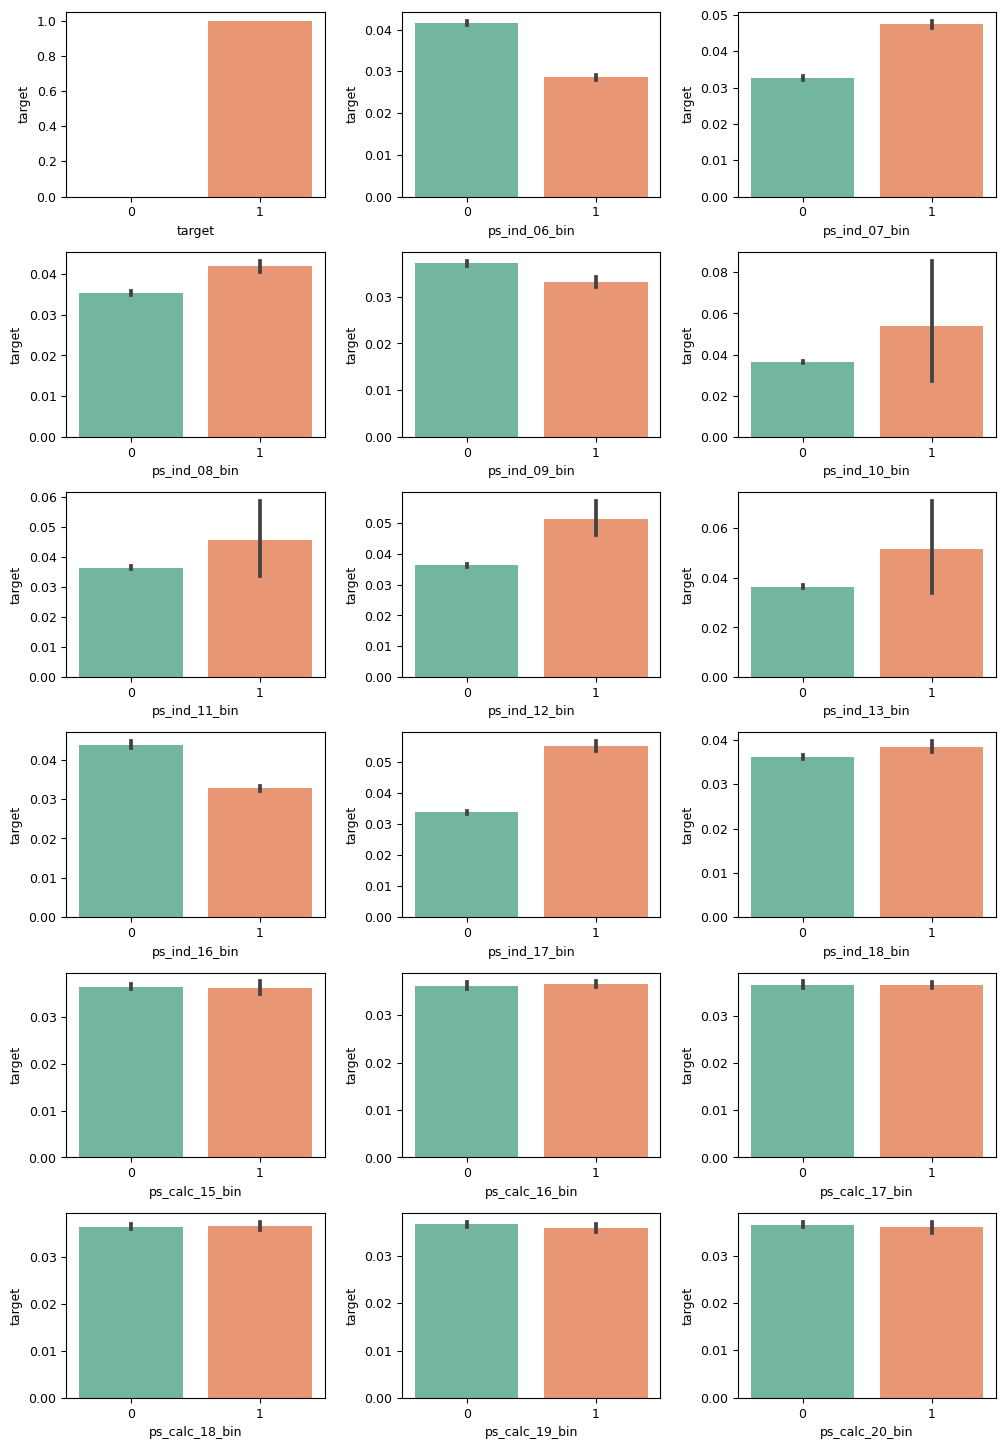

In [36]:
bin_features = summary[summary['데이터 종류'] == '이진형'].index # 이진피처
# 이진 피처 고윳값별 타깃값 1 비율을 막대 그래프로 그리기
plot_target_ratio_by_features(train, bin_features, 6, 3) # 6행 3열 배치

- ps_ind_10_bin~ps_ind_13_bin은 신뢰구간이 넓어 통계적 유효성이 떨어짐
- ps_calc_15_bin~ps_calc_20_bin은 고윳값별 타깃값 비율 차이가 없어 타깃값 예측력이 없음
- 즉 위의 피처명 부분은 모델링 시 제거해야할 피처이다.
- 그리고 추가적으로 calc 분류의 이진 피처는 모두 타깃값 비율에 차이가 없다 calc 분류의 다른 피처도 차이가 없는지 추후 알아보도록 하자

#### 명목형 피처


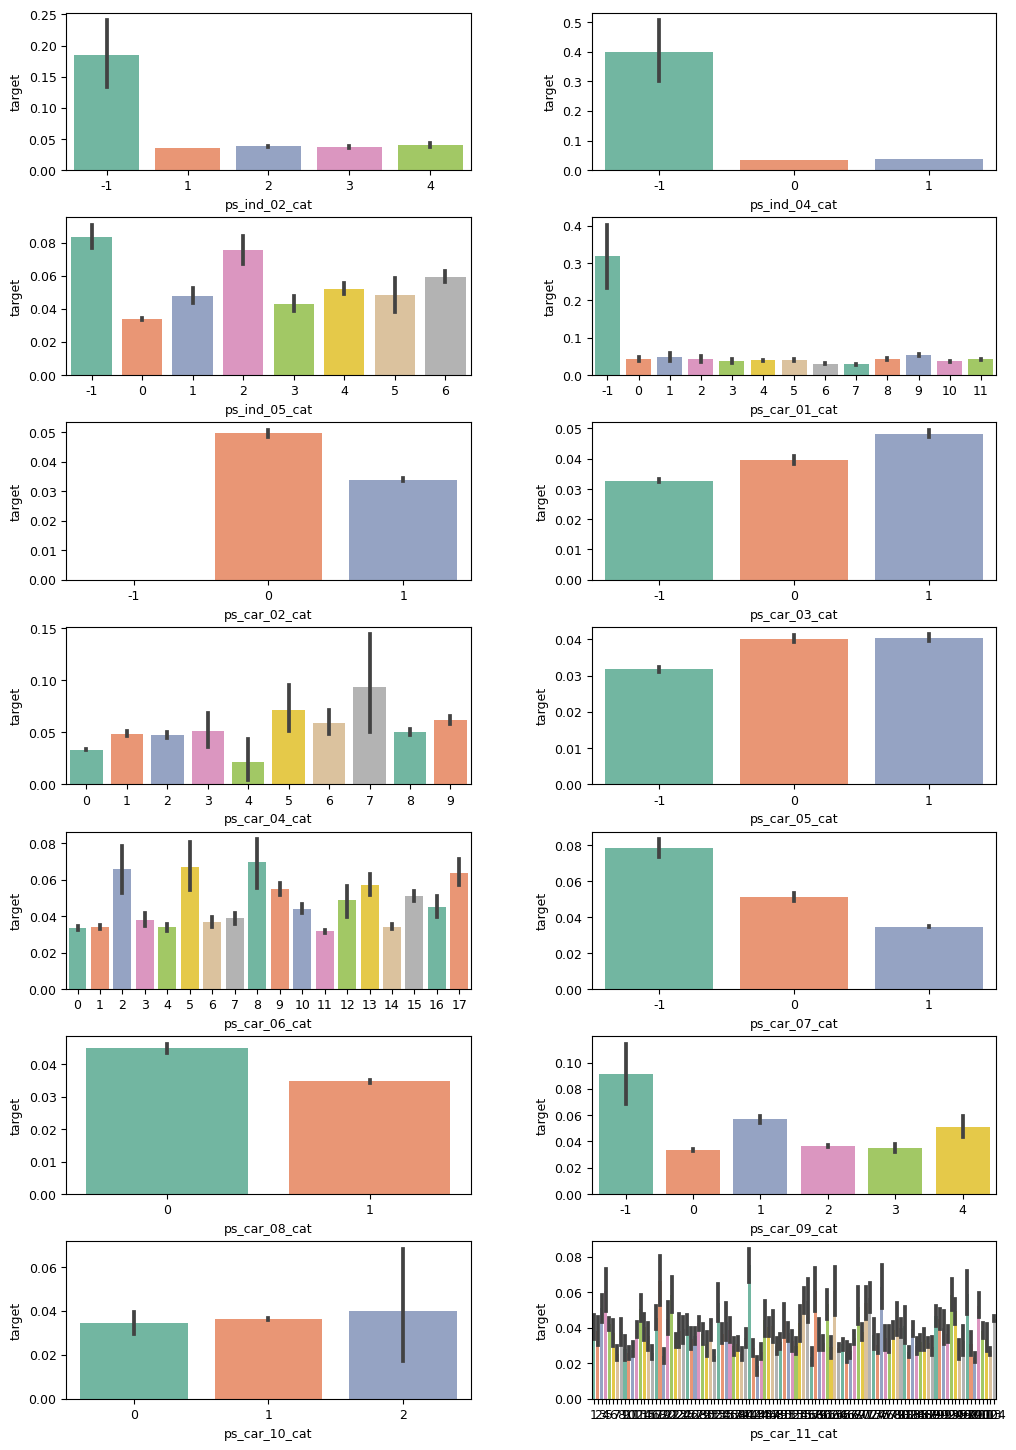

In [37]:
nom_features = summary[summary['데이터 종류'] == '명목형'].index # 명목형 피처
plot_target_ratio_by_features(train, nom_features, 7 ,2 )

- 이번에는 -1 값을 포함한 피처도 많은 것을 확인하 수 있다. -1은 결측값이다. 보통 결측값은 적절히 처리한다.
- 예컨대 결측값이 많지 않다면 다른 값으로 대체하고, 결측값이 많다면 해당 피처 자체를제거한다. 하지만 결측값 자체가 타깃값 예측에 도움을 주는 경우도 있다.
- (1)번의 그래프 ps_ind_02_cat 피처를 보자 결측값 -1이 다른 고윳값들보다 타깃갑 1배율이 크다. 신뢰구간이 넓다는 점을 감안해도 비율이 확실히 크다. 이런 상황에서 결측값을 다른 값으로 대체하면 모델 성능이 나빠질 수 있다. 결측갑 자체가 타깃값에 대한 예측력이 있기 때문이다. 따라서 결측값을 그대로 두고 모델링하겠다. -1도 하나의 고윳값이라고 간주하는 것이다.